# import libraries

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly. express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML


# load dataset

In [2]:
df = pd.read_csv('/Users/ingluissantana/Desktop/Py/PP1_bike_sharing_MVG/MVG_Rad_Fahrten_2021.csv', delimiter= ';')

# quality and cleaning of the data

In [3]:
#to make the data more readable i will change everything to lowercase and use a _ instead of a space

df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns = string_columns[2:]

numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
numerical_columns = numerical_columns[2:]

for col in string_columns:
    df[col] = df[col].str.lower().str.rstrip().str.replace(' ', '_')

## changing the types to date format

In [4]:
df['starttime'] = pd.to_datetime(df["starttime"])
df['endtime'] = pd.to_datetime(df["endtime"])
df['starttime'] = df['starttime'].astype('datetime64[s]')
df['endtime'] = df['endtime'].astype('datetime64[s]')


# quick view of the data

In [5]:
df.head().T

,0,1,2,3,4
row,1,2,3,4,5
starttime,2021-01-01 01:01:00,2021-01-01 01:19:00,2021-01-01 01:48:00,2021-01-01 01:48:00,2021-01-01 03:26:00
endtime,2021-01-01 01:12:00,2021-01-01 01:59:00,2021-01-01 02:01:00,2021-01-01 02:00:00,2021-01-01 03:39:00
startlat,48.1258,48.12919,48.08189,48.08189,48.11587
startlon,11.64784,11.62583,11.63264,11.63264,11.62543
endlat,48.12948,48.14853,48.07975,48.07975,48.109
endlon,11.62539,11.53142,11.61032,11.61032,11.6524
rental_is_station,1,0,1,1,0
rental_station_name,kreillerstraße,,universitätsstraße_neubiberg,universitätsstraße_neubiberg,
return_is_station,0,0,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619573 entries, 0 to 619572
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   row                  619573 non-null  int64         
 1   starttime            619573 non-null  datetime64[ns]
 2   endtime              619573 non-null  datetime64[ns]
 3   startlat             619573 non-null  float64       
 4   startlon             619573 non-null  float64       
 5   endlat               619573 non-null  float64       
 6   endlon               619573 non-null  float64       
 7   rental_is_station    619573 non-null  int64         
 8   rental_station_name  619573 non-null  object        
 9   return_is_station    619573 non-null  int64         
 10  return_station_name  619573 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 52.0+ MB


# unique, duplicated and null values

In [7]:
df.agg(['count', 'size', 'nunique'])



,row,starttime,endtime,startlat,startlon,endlat,endlon,rental_is_station,rental_station_name,return_is_station,return_station_name
count,619573,619573,619573,619573,619573,619573,619573,619573,619573,619573,619573
size,619573,619573,619573,619573,619573,619573,619573,619573,619573,619573,619573
nunique,619573,272997,273299,14609,19791,15751,21161,2,321,2,319


In [8]:
df.isnull().all()

row                    False
starttime              False
endtime                False
startlat               False
startlon               False
endlat                 False
endlon                 False
rental_is_station      False
rental_station_name    False
return_is_station      False
return_station_name    False
dtype: bool

In [9]:
duplicate = df[df.duplicated(string_columns)]
duplicate.head()

,row,starttime,endtime,startlat,startlon,endlat,endlon,rental_is_station,rental_station_name,return_is_station,return_station_name
3,4,2021-01-01 01:48:00,2021-01-01 02:00:00,48.08189,11.63264,48.07975,11.61032,1,universitätsstraße_neubiberg,1,fasanenpark_ost_neubiberg
4,5,2021-01-01 03:26:00,2021-01-01 03:39:00,48.11587,11.62543,48.10900,11.65240,0,,0,
6,7,2021-01-01 03:37:00,2021-01-01 04:05:00,48.16183,11.56665,48.17449,11.52564,0,,0,
7,8,2021-01-01 03:45:00,2021-01-01 04:16:00,48.15333,11.53426,48.17950,11.55080,0,,0,
8,9,2021-01-01 04:15:00,2021-01-01 04:28:00,48.12995,11.49411,48.14668,11.50734,0,,0,


- valores duplicados no aportan informacion

In [10]:
visitados = df[string_columns].value_counts()
visitados
visitados.head(20)

rental_station_name             return_station_name
                                                       359979
sandstraße                                               2732
münchner_freiheit                                        2641
olympiazentrum                                           2412
maillingerstraße                                         2084
                                sandstraße               2019
tum_arcisstraße                                          1987
rotkreuzplatz                                            1971
technische_universität_münchen                           1744
leonrodplatz                                             1741
universität                                              1716
goetheplatz_(nord)                                       1610
                                münchner_freiheit        1566
                                rotkreuzplatz            1563
hauptbahnhof_nord                                        1526
hackerbrücke      

# eda

In [11]:
# days of the week with more bike usage
df['weekday'] = df['starttime'].dt.dayofweek



In [12]:
df.weekday.nunique()

7

In [13]:
count_weekday = df.groupby(["weekday"])["row"].count()
count_weekday = count_weekday.to_frame()
count_weekday


,row
weekday,
0,78248
1,84160
2,85672
3,87083
4,96452
5,103728
6,84230


<AxesSubplot:xlabel='weekday'>

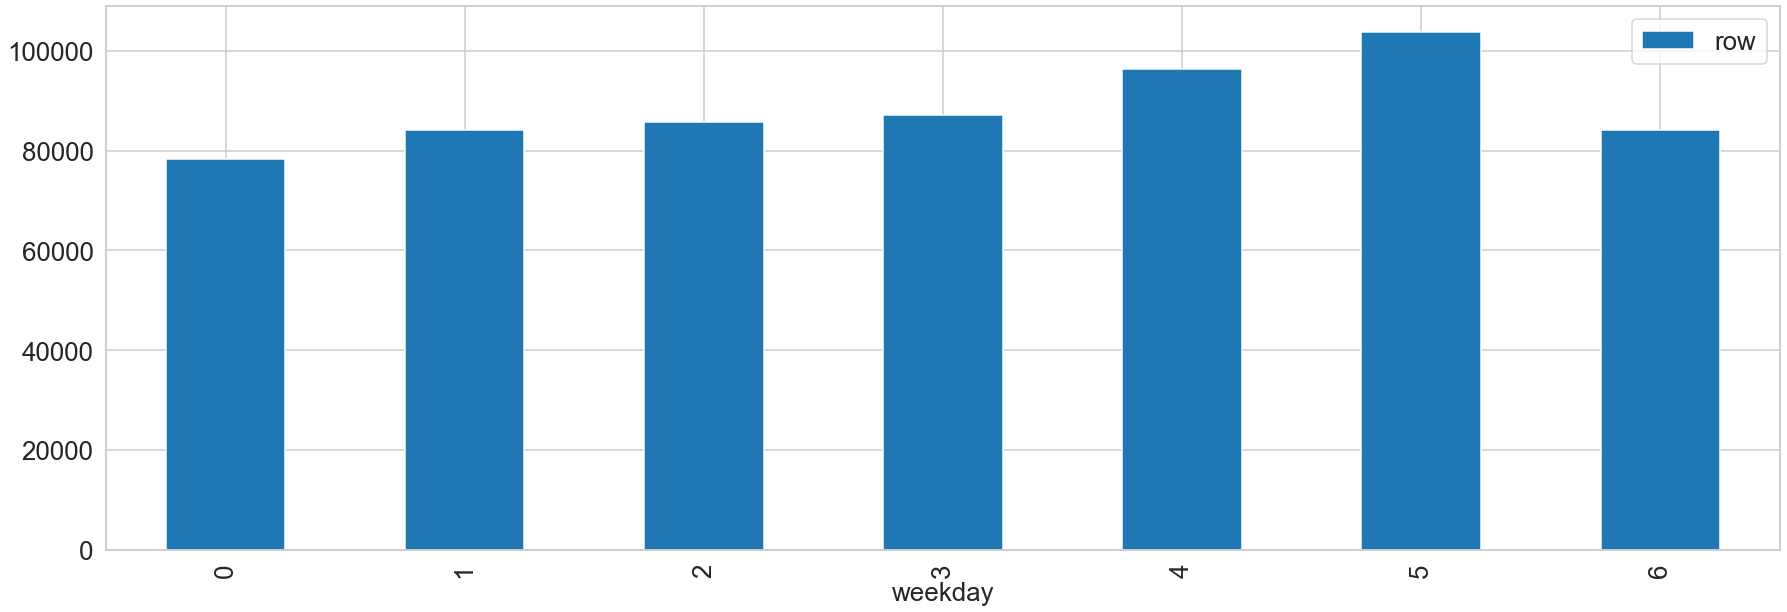

In [14]:
#plot the dataframe
count_weekday.plot.bar()

In [15]:
# time of the day with more bike usage

In [16]:
df['hoursday'] = df['starttime'].dt.hour

In [17]:
df.hoursday.nunique()

24

In [18]:
count_hour = df.groupby(["hoursday"])["row"].count()
count_hour = count_hour.to_frame()
count_hour

,row
hoursday,
0,9591
1,8493
2,5823
3,3420
4,2104
5,2468
6,5674
7,18109
8,33824


<AxesSubplot:xlabel='hoursday'>

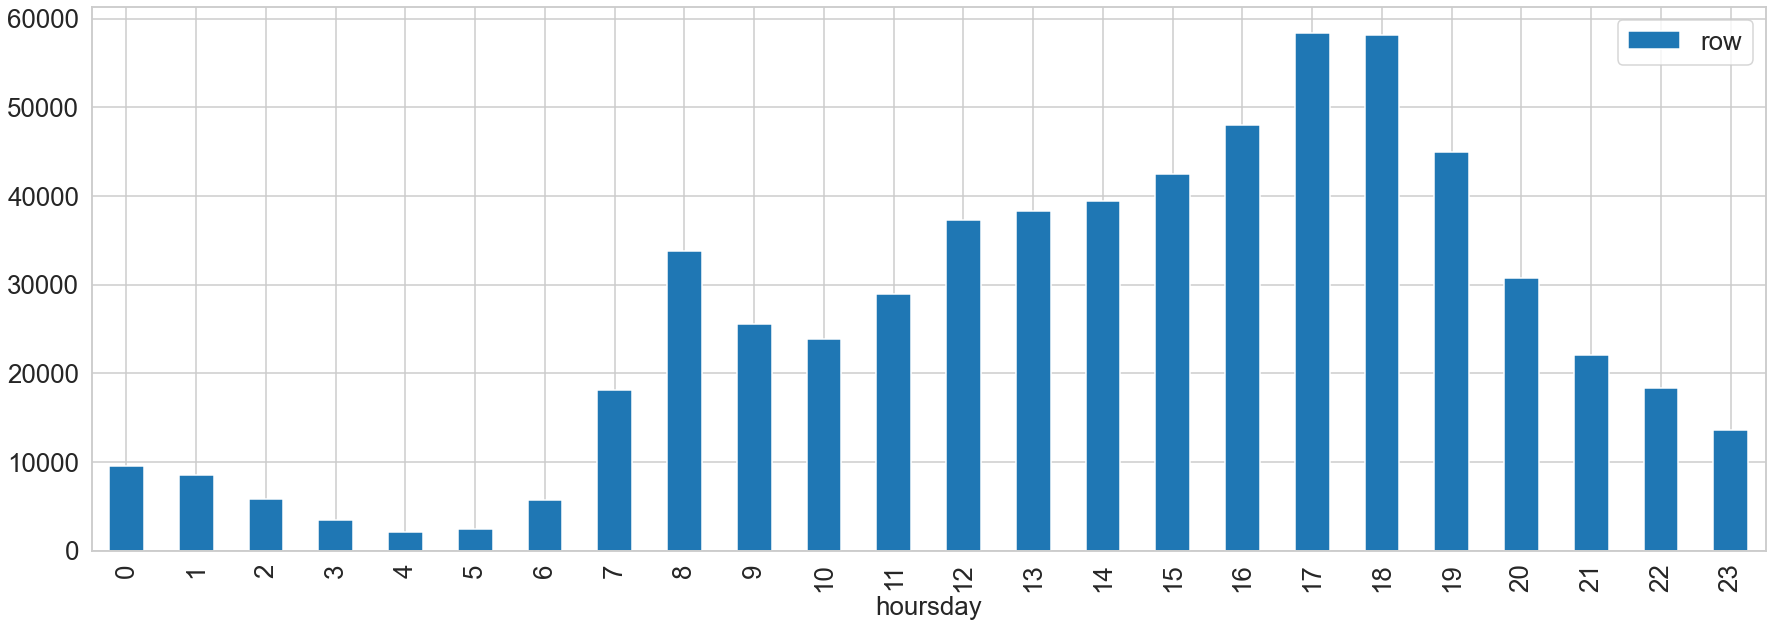

In [19]:
count_hour.plot.bar()

In [20]:
# which station is the one with more starts

In [21]:
more_starts = df['rental_station_name'].value_counts()
more_starts
more_starts.head(10)

                                  427906
sandstraße                          3747
münchner_freiheit                   3670
olympiazentrum                      3421
maillingerstraße                    2794
tum_arcisstraße                     2786
rotkreuzplatz                       2718
leonrodplatz                        2463
universität                         2448
technische_universität_münchen      2418
Name: rental_station_name, dtype: int64

In [22]:
# which station is the one with more ends

In [23]:
more_ends = df['return_station_name'].value_counts()
more_ends
more_ends.head(10)

                     475481
sandstraße             3119
münchner_freiheit      2673
olympiazentrum         2522
rotkreuzplatz          2430
maillingerstraße       2147
hauptbahnhof_nord      2023
leonrodplatz           1942
universität            1899
tum_arcisstraße        1877
Name: return_station_name, dtype: int64

In [24]:
# visualize in a map the biggest usage sectors

In [ ]:
https://juanitorduz.github.io/germany_plots/